In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('shopper_week.csv')


In [7]:
df.head()

,timestamp,customer_num,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:04:00,1,dairy
2,2019-09-02 07:05:00,1,checkout
3,2019-09-02 07:03:00,2,dairy
4,2019-09-02 07:04:00,2,dairy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53901 entries, 0 to 53900
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     53901 non-null  object
 1   customer_num  53901 non-null  int64 
 2   location      53901 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df['location'].unique()

array(['dairy', 'checkout', 'spices', 'drinks', 'fruit'], dtype=object)

In [10]:
df = pd.read_csv('shopper_week.csv', parse_dates=['timestamp'])

In [11]:
df.head()

,timestamp,customer_num,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:04:00,1,dairy
2,2019-09-02 07:05:00,1,checkout
3,2019-09-02 07:03:00,2,dairy
4,2019-09-02 07:04:00,2,dairy


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53901 entries, 0 to 53900
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     53901 non-null  datetime64[ns]
 1   customer_num  53901 non-null  int64         
 2   location      53901 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


# Having datetime as an index makes it easier to slice the data by it. Pandas .loc knows how to interpet datetime values:

- df.loc['2011-01-01']
- df.loc['2011-01-01':'2011-01-07']

In [14]:
df = pd.read_csv('shopper_week.csv', parse_dates=True, index_col=0)

In [15]:
df.head()

,customer_num,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:04:00,1,dairy
2019-09-02 07:05:00,1,checkout
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,2,dairy


In [17]:
df.loc['2019-09-03'] # here I can get a specific date

,customer_num,location
timestamp,,
2019-09-03 07:02:00,1448,fruit
2019-09-03 07:03:00,1448,fruit
2019-09-03 07:04:00,1448,fruit
2019-09-03 07:05:00,1448,drinks
2019-09-03 07:06:00,1448,drinks
...,...,...
2019-09-03 21:46:00,2868,fruit
2019-09-03 21:47:00,2868,drinks
2019-09-03 21:48:00,2868,checkout


## Extracting features from datetime

In [18]:
df.index.day

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype='int32', name='timestamp', length=53901)

### This data can then be added as a new column. This is called feature extraction

In [19]:
df['day'] = df.index.day

In [20]:
df['hour'] = df.index.hour

In [21]:
df

,customer_num,location,day,hour
timestamp,,,,
2019-09-02 07:03:00,1,dairy,2,7
2019-09-02 07:04:00,1,dairy,2,7
2019-09-02 07:05:00,1,checkout,2,7
2019-09-02 07:03:00,2,dairy,2,7
2019-09-02 07:04:00,2,dairy,2,7
...,...,...,...,...
2019-09-06 21:49:00,7431,dairy,6,21
2019-09-06 21:50:00,7431,checkout,6,21
2019-09-06 21:48:00,7432,dairy,6,21


In [22]:
df.index.year

Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='timestamp', length=53901)

## OPTIONAL: plot the customers per day in the super market
- this is easier in the bike dataset since each observation is one customer yet here each observation is the position of one customer at a certian time and place
- do not do with weaker groups

In [24]:
# drop duplicates 

df.drop_duplicates(subset=['customer_num'], keep='first', inplace=True)

In [25]:
df

,customer_num,location,day,hour
timestamp,,,,
2019-09-02 07:03:00,1,dairy,2,7
2019-09-02 07:03:00,2,dairy,2,7
2019-09-02 07:04:00,3,dairy,2,7
2019-09-02 07:04:00,4,dairy,2,7
2019-09-02 07:04:00,5,spices,2,7
...,...,...,...,...
2019-09-06 21:47:00,7428,fruit,6,21
2019-09-06 21:48:00,7429,fruit,6,21
2019-09-06 21:48:00,7430,dairy,6,21


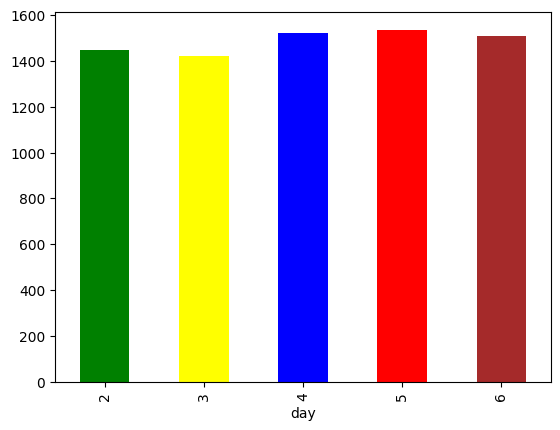

In [26]:
# then plot with panda

df.groupby('day')['customer_num'].count().plot.bar(color=['green', 'yellow', 'blue', 'red', 'brown']);

## Binning data to create new features
- The new features can also be used to create more features
- Binning the data into categories can help give new insights
- Binning enables groupingy by the new categorgies for further insights
- We can start by finding the max and min of the column we want to 'bin'

In [75]:
# we could create a bin for an hour or a day (decide the min and max which would be hour)

df['hour'].min(), df['hour'].max()

KeyError: 'hour'

In [32]:
# then decide what are bins will be titled: decide on days of the week

bin_labels = ['morning', 'afternoon', 'evening']

## Define the bine boundaries:

In [33]:
#bin_boundaries = [-np.inf, 12, 17, np.inf]
bin_boundaries = [6.9, 12, 17, 21.1] # we need to go lower than 7 am to get the values from 7 am on
# bins do not include start and end values so min must be a tad below and max a tad above
# or the infinity from numpy can be used as in the above commented out code



In [34]:
pd.cut(df['hour'], bins=bin_boundaries, labels=bin_labels)

timestamp
2019-09-02 07:03:00    morning
2019-09-02 07:03:00    morning
2019-09-02 07:04:00    morning
2019-09-02 07:04:00    morning
2019-09-02 07:04:00    morning
                        ...   
2019-09-06 21:47:00    evening
2019-09-06 21:48:00    evening
2019-09-06 21:48:00    evening
2019-09-06 21:48:00    evening
2019-09-06 21:48:00    evening
Name: hour, Length: 7432, dtype: category
Categories (3, object): ['morning' < 'afternoon' < 'evening']

In [35]:
df['part_of_day']=pd.cut(df['hour'], bins=bin_boundaries, labels=bin_labels)



In [36]:
df.head()

,customer_num,location,day,hour,part_of_day
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,2,7,morning
2019-09-02 07:03:00,2,dairy,2,7,morning
2019-09-02 07:04:00,3,dairy,2,7,morning
2019-09-02 07:04:00,4,dairy,2,7,morning
2019-09-02 07:04:00,5,spices,2,7,morning


## Rolling average and ploting rolling average

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df_hourly = pd.read_csv('shoppers_hourly.csv', index_col=0, parse_dates=True)

# this calculates the rolling mean of our data

In [47]:
df_hourly

,customer_count
timestamp,
2019-09-02 07:00:00,102
2019-09-02 08:00:00,123
2019-09-02 09:00:00,99
2019-09-02 10:00:00,94
2019-09-02 11:00:00,60
...,...
2019-09-06 17:00:00,129
2019-09-06 18:00:00,163
2019-09-06 19:00:00,154


In [48]:
df_hourly['rolling'] = df_hourly['customer_count'].rolling(window=12).mean()

In [49]:
df_hourly

,customer_count,rolling
timestamp,,
2019-09-02 07:00:00,102,NaN
2019-09-02 08:00:00,123,NaN
2019-09-02 09:00:00,99,NaN
2019-09-02 10:00:00,94,NaN
2019-09-02 11:00:00,60,NaN
...,...,...
2019-09-06 17:00:00,129,97.750000
2019-09-06 18:00:00,163,111.333333
2019-09-06 19:00:00,154,116.333333


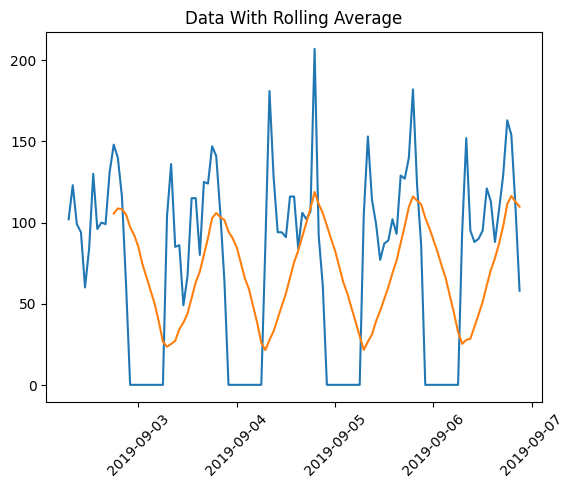

In [51]:
# and now plot

plt.plot(df_hourly.index, df_hourly['customer_count'])
plt.plot(df_hourly.index, df_hourly['rolling'])
plt.xticks(rotation=45)
plt.title('Data With Rolling Average')

plt.show()

In [54]:
df_hourly = pd.read_csv('shoppers_hourly.csv', index_col=0, parse_dates=True)
df_hourly['rolling'] = df_hourly['customer_count'].rolling(window=20).mean()

In [55]:
df_hourly

,customer_count,rolling
timestamp,,
2019-09-02 07:00:00,102,NaN
2019-09-02 08:00:00,123,NaN
2019-09-02 09:00:00,99,NaN
2019-09-02 10:00:00,94,NaN
2019-09-02 11:00:00,60,NaN
...,...,...
2019-09-06 17:00:00,129,58.65
2019-09-06 18:00:00,163,66.80
2019-09-06 19:00:00,154,74.50
